In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comments=pd.read_csv(r'UScomments.csv',on_bad_lines='skip')

C:\Users\gupta\AppData\Local\Temp\ipykernel_2764\2120891891.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r'UScomments.csv',on_bad_lines='skip')


Above is a warning we can ignore it as we are skipping the bad lines error thats why it shows you the Warning

In [4]:
comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
### Dropping Null Values
comments.dropna(inplace=True)

In [7]:
comments.shape

(691374, 4)

In [8]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


## 1 Performing the Sentimental Analysis

Basically the sentimental analysis is use to study and analyse the emotion of your customer from the dataset.The value of sentimental analysis is always between[-1,1] and this term is called Polarity.

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [11]:
comments.head(8)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0


In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

Since the polarity value is 0.0 we can say that it is neutral comment if polarity value would be closer to negative -1 it will be bad comment and if it is closer to positive +1 it will be consider as positive comments.

Now we are going to perform sentimental analysis for the whole data

In [13]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [23]:
comments['polarity']= polarity

In [24]:
comments.head(10000)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
...,...,...,...,...,...
9996,lwOQbMcXtfU,All the people saying a Tsunami is coming... 🙄,0,0,0.000000
9997,lwOQbMcXtfU,Lools like the glowing sea in fallout,0,0,0.000000
9998,lwOQbMcXtfU,The Simpsons were right again!,0,0,0.357143
9999,lwOQbMcXtfU,So is the water back?,0,0,0.000000


## 2 Performing The Wordcloud Analysis For the data.

Wordcloud analysis is basically the graph representation of the text data

In [25]:
!pip install wordcloud

In [26]:
from wordcloud import WordCloud

In [27]:
filter1=comments['polarity']==1

In [28]:
Positive_comments=comments[filter1]

In [29]:
filter2=comments['polarity']==-1

In [30]:
Negative_comments=comments[filter2]

In [31]:
from wordcloud import WordCloud,STOPWORDS

In [32]:
set(STOPWORDS)# STOPWORDS are the words which have zero contribution in wordcloud analysis

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [33]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [34]:
type(comments['comment_text'])# we need to convert the type of cooment from string to text since wordcloud only accept textin string format.

pandas.core.series.Series

In [35]:
Total_Positive_comments=''.join(Positive_comments['comment_text'])

In [36]:
Total_Negative_comments=''.join(Negative_comments['comment_text'])

In [37]:
Positive_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(Total_Positive_comments)

(-0.5, 399.5, 199.5, -0.5)

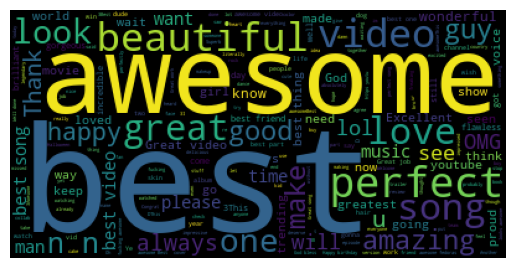

In [38]:
plt.imshow(Positive_wordcloud)
plt.axis("off")

In [39]:
Negative_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(Total_Negative_comments)

(-0.5, 399.5, 199.5, -0.5)

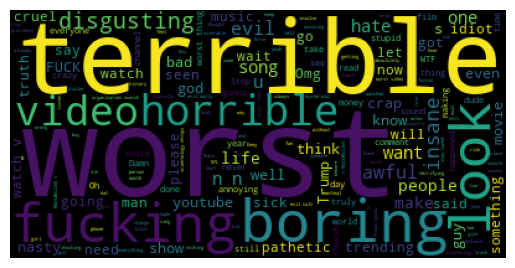

In [40]:
plt.imshow(Negative_wordcloud)
plt.axis('off')

## 3  Performing The Emoji Analysis

In [41]:
!pip install emoji==2.2.0

In [42]:
import emoji

In [43]:
emoji.__version__

'2.2.0'

In [44]:
comments['comment_text'].head(8)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
Name: comment_text, dtype: object

In [45]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():#in case we have any missing value use dropna.()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)       

In [46]:
all_emojis_list [0:15]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈', '😂', '🔥']

Now we have to compute frequencies of each & every emoji in "all_emojis_list".

In [47]:
from collections import Counter

In [48]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

Now we need to display two list one for emoji and another for the count so that we can create the graph

In [49]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [50]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [51]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [52]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [53]:
emojis=[Counter(all_emojis_list).most_common(10)[i][0]for i in range(10)]

In [54]:
frequency=[Counter(all_emojis_list).most_common(10)[i][1]for i in range(10)]

In [55]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [56]:
trace = go.Bar(x=emojis , y=frequency)

In [58]:
iplot([trace])

### From the graph we can say that most of the emoji in the dataset is funny